In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

# dataset predicts is company will go bankrupt in the next year and probability it will go bankrupt in k number of years
data = pd.read_csv("data/1_american_dataset.csv")
# comp = pd.read_csv("data/Compustat Fundamentals Annual 01.2010.csv")

In [145]:
data.head()

,cik,fyear,company_name,tic,status_label,current_assets,total_assets,cost_of_goods_sold,total_long_term_debt,depreciation_and_amortization,...,total_current_liabilities,net_income,retained_earnings,total_receivables,total_revenue,market_value,total_liabilities,net_sales,total_operating_expenses,status
0,1750,1999.0,AAR CORP,AIR,alive,511.267,740.998,833.107,180.447,18.373,...,163.816,35.163,201.026,128.348,1024.333,372.7519,401.483,1024.333,935.302,0
1,1750,2000.0,AAR CORP,AIR,alive,485.856,701.854,713.811,179.987,18.577,...,125.392,18.531,204.065,115.187,874.255,377.1180,361.642,874.255,809.888,0
2,1750,2001.0,AAR CORP,AIR,alive,436.656,710.199,526.477,217.699,22.496,...,150.464,-58.939,139.603,77.528,638.721,364.5928,399.964,638.721,611.514,0
3,1750,2002.0,AAR CORP,AIR,alive,396.412,686.621,496.747,164.658,27.172,...,203.575,-12.410,124.106,66.322,606.337,143.3295,391.633,606.337,575.592,0
4,1750,2003.0,AAR CORP,AIR,alive,432.204,709.292,523.302,248.666,26.680,...,131.261,3.504,131.884,104.661,651.958,308.9071,407.608,651.958,604.467,0


In [146]:
data.shape
data.info()
data.isnull().sum()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cik                            78682 non-null  int64  
 1   fyear                          78682 non-null  float64
 2   company_name                   78682 non-null  object 
 3   tic                            78682 non-null  object 
 4   status_label                   78682 non-null  object 
 5   current_assets                 78682 non-null  float64
 6   total_assets                   78682 non-null  float64
 7   cost_of_goods_sold             78682 non-null  float64
 8   total_long_term_debt           78682 non-null  float64
 9   depreciation_and_amortization  78682 non-null  float64
 10  ebit                           78682 non-null  float64
 11  ebitda                         78682 non-null  float64
 12  gross_profit                   78682 non-null 

cik                                int64
fyear                            float64
company_name                      object
tic                               object
status_label                      object
current_assets                   float64
total_assets                     float64
cost_of_goods_sold               float64
total_long_term_debt             float64
depreciation_and_amortization    float64
ebit                             float64
ebitda                           float64
gross_profit                     float64
inventory                        float64
total_current_liabilities        float64
net_income                       float64
retained_earnings                float64
total_receivables                float64
total_revenue                    float64
market_value                     float64
total_liabilities                float64
net_sales                        float64
total_operating_expenses         float64
status                             int64
dtype: object

## Supervised Learning Model
This model will utilize supervised learning. The final column (**status**) is 0 if the company did not go bankrupt for a given year, and 1 if the company did. All columns with numerical dtypes, expect for the company id denoted with (**cik**), are features for bankruptcy prediction. 
## Data Split
The data is split randomly into training and testing (validation) sets. 
75% of the data is used for trainging and 25% is used for validation. 

![Dataset split](1_train-test-split_0.jpeg)

In [147]:
# remove non numerical values from the model
df = data.select_dtypes(include=['float64','int64'])
# drop irrelivant categories
X = df.drop(['cik', 'fyear', 'status'], axis=1).to_numpy()
y = df["status"].to_numpy()

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logestic Regression

In [148]:
# normalize and train 
bankrupt_logistic = make_pipeline(StandardScaler(), LogisticRegression())
bankrupt_logistic.fit(X_train, y_train)
bankrupt_logistic.score(X_test, y_test)

0.932198004702294

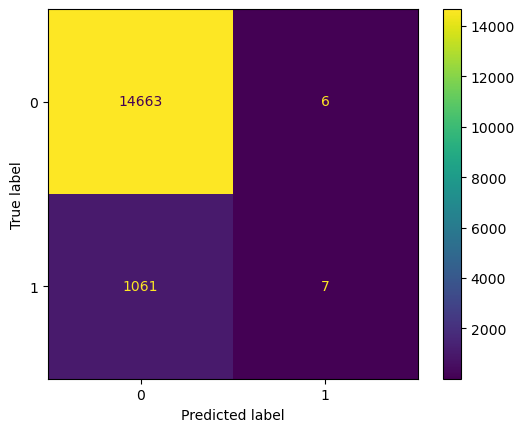

In [149]:
# confusion matrix for predictions
predictions = bankrupt_logistic.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=bankrupt_logistic.classes_)

# display graphic
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels=bankrupt_logistic.classes_)
cm_display.plot()
plt.show()

In [150]:
# scores on seen and unseen data
print("Training: ", bankrupt_logistic.score(X_train, y_train))
print("Test: ", bankrupt_logistic.score(X_test, y_test))
print(bankrupt_logistic.predict_proba(X_test))

Training:  0.9341170863452221
Test:  0.932198004702294
[[9.27289159e-01 7.27108406e-02]
 [9.39458204e-01 6.05417955e-02]
 [9.29136244e-01 7.08637562e-02]
 ...
 [9.24303242e-01 7.56967579e-02]
 [9.99507859e-01 4.92140895e-04]
 [9.99999994e-01 6.38441105e-09]]


### Naive Bayes
Assumes conditional independence between every pair of features.